In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('/content/train.csv')
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

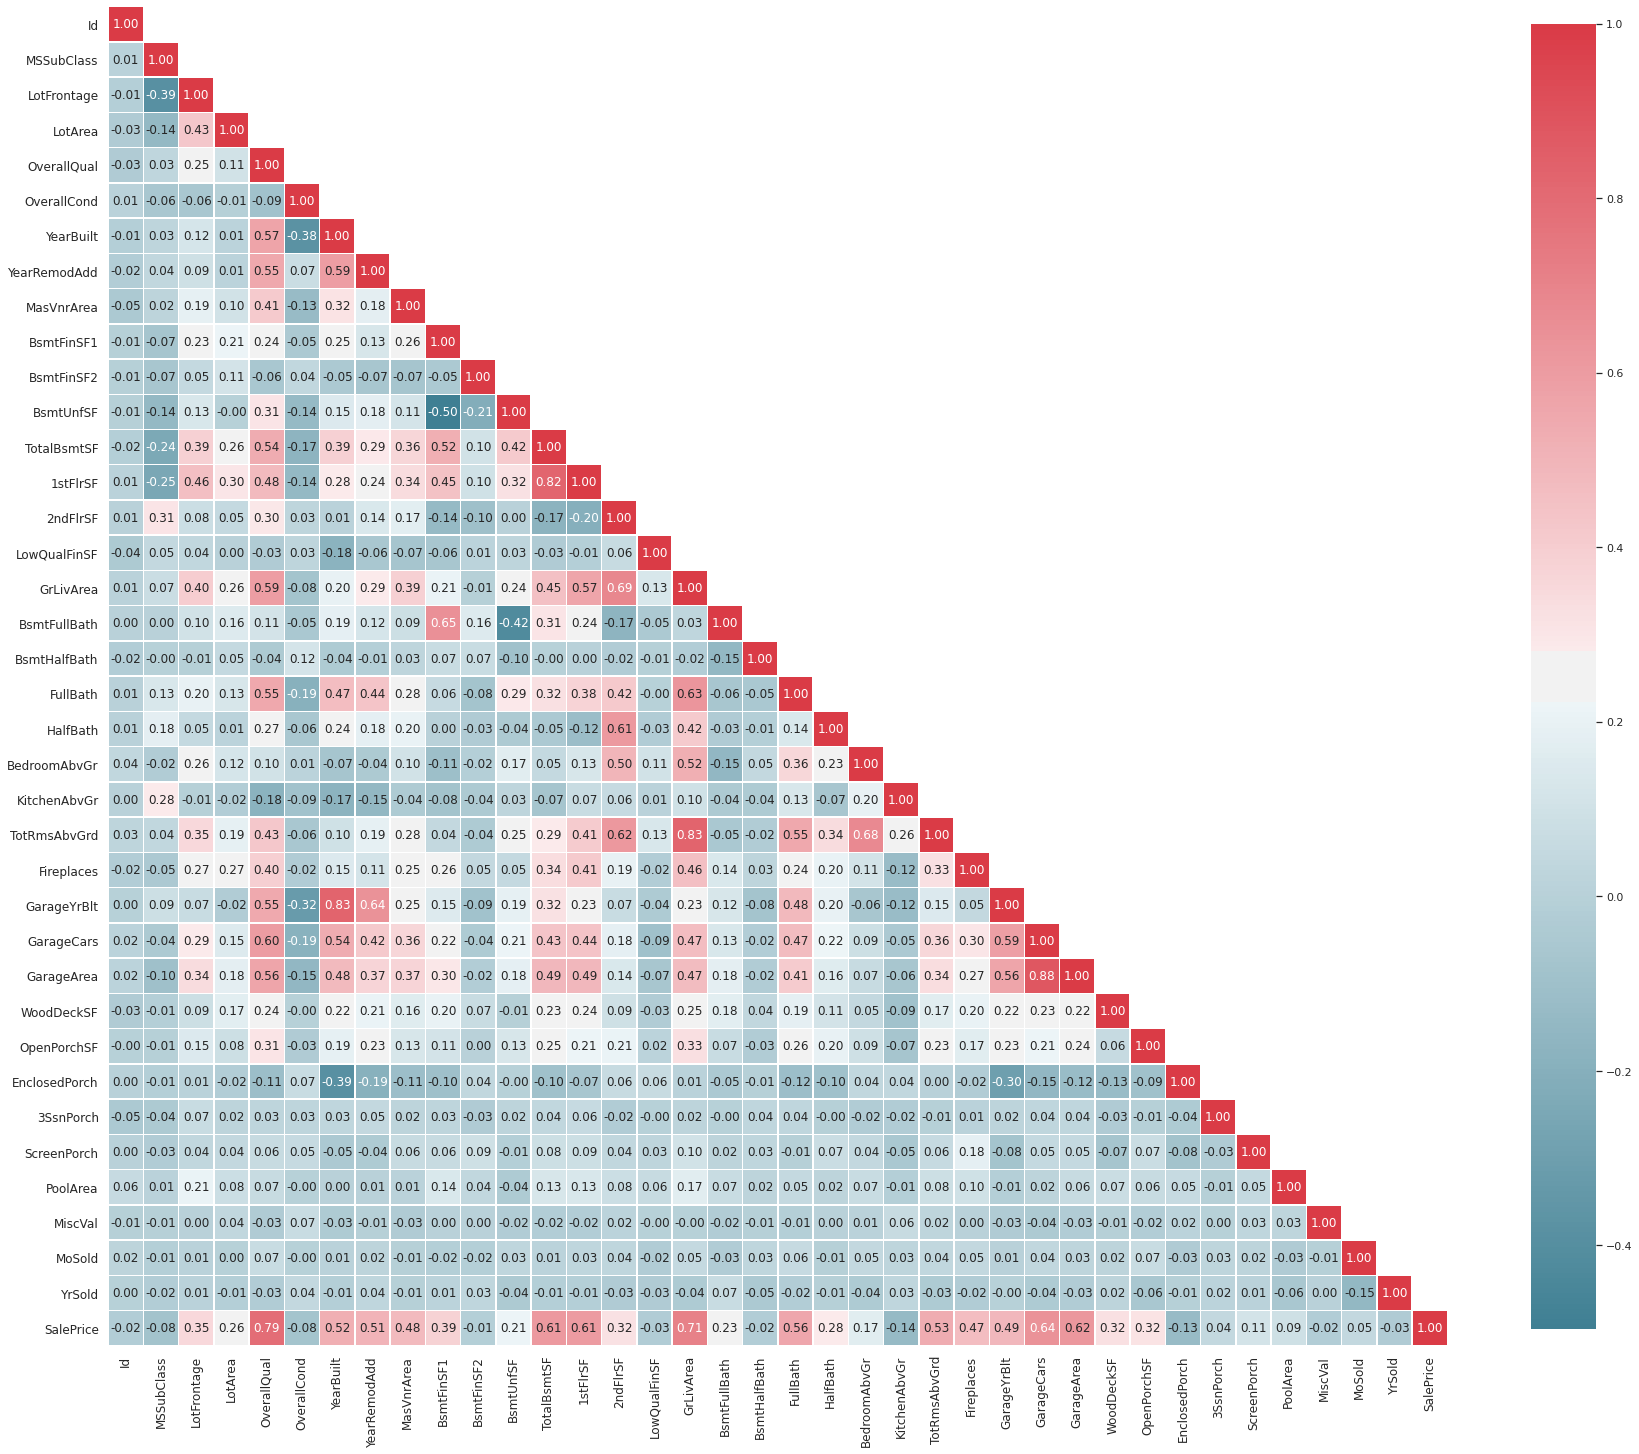

In [3]:
corr_whole = data.corr()
mask = np.zeros_like(corr_whole, dtype=np.bool)
mask[np.triu_indices_from(mask, k=1)] = True
sns.set(style="white")
f, ax = plt.subplots(figsize=(30, 30))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
g = sns.heatmap(corr_whole, mask=mask, cmap=cmap, vmax=1,
            square=True, annot=True, fmt = '.2f',
            linewidths=.5, cbar_kws={"shrink": .8}, ax=ax )

locs, labels = plt.yticks();
g.set_yticklabels(labels, rotation=0, size='medium')
locs, labels = plt.xticks();
g.set_xticklabels(labels, rotation=90, size='medium')
plt.savefig('corr_whole.pdf')
plt.show()

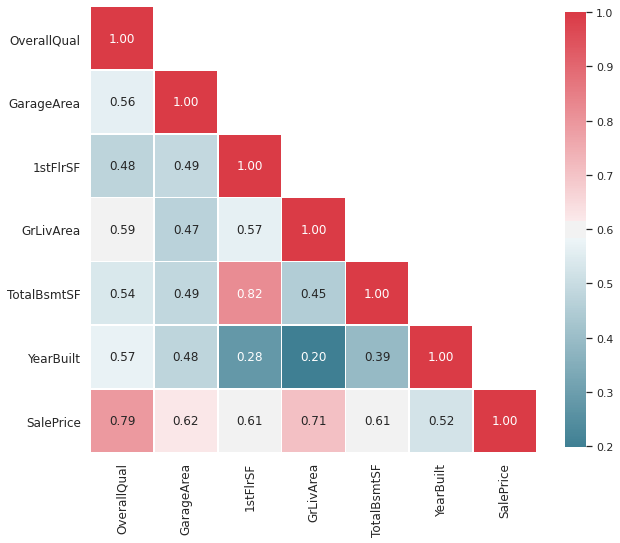

In [4]:
data_train = data[['OverallQual', 'GarageArea', '1stFlrSF', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'SalePrice']]
corr_train = data_train.corr()

mask = np.zeros_like(corr_train, dtype=np.bool)
mask[np.triu_indices_from(mask, k=1)] = True
sns.set(style="white")
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
g = sns.heatmap(corr_train, mask=mask, cmap=cmap, vmax=1,
            square=True, annot=True, fmt = '.2f',
            linewidths=.5, cbar_kws={"shrink": .8}, ax=ax )

locs, labels = plt.yticks();
g.set_yticklabels(labels, rotation=0, size='medium')
locs, labels = plt.xticks();
g.set_xticklabels(labels, rotation=90, size='medium')
plt.savefig('corr.jpg')
plt.show()

<Figure size 1080x576 with 0 Axes>

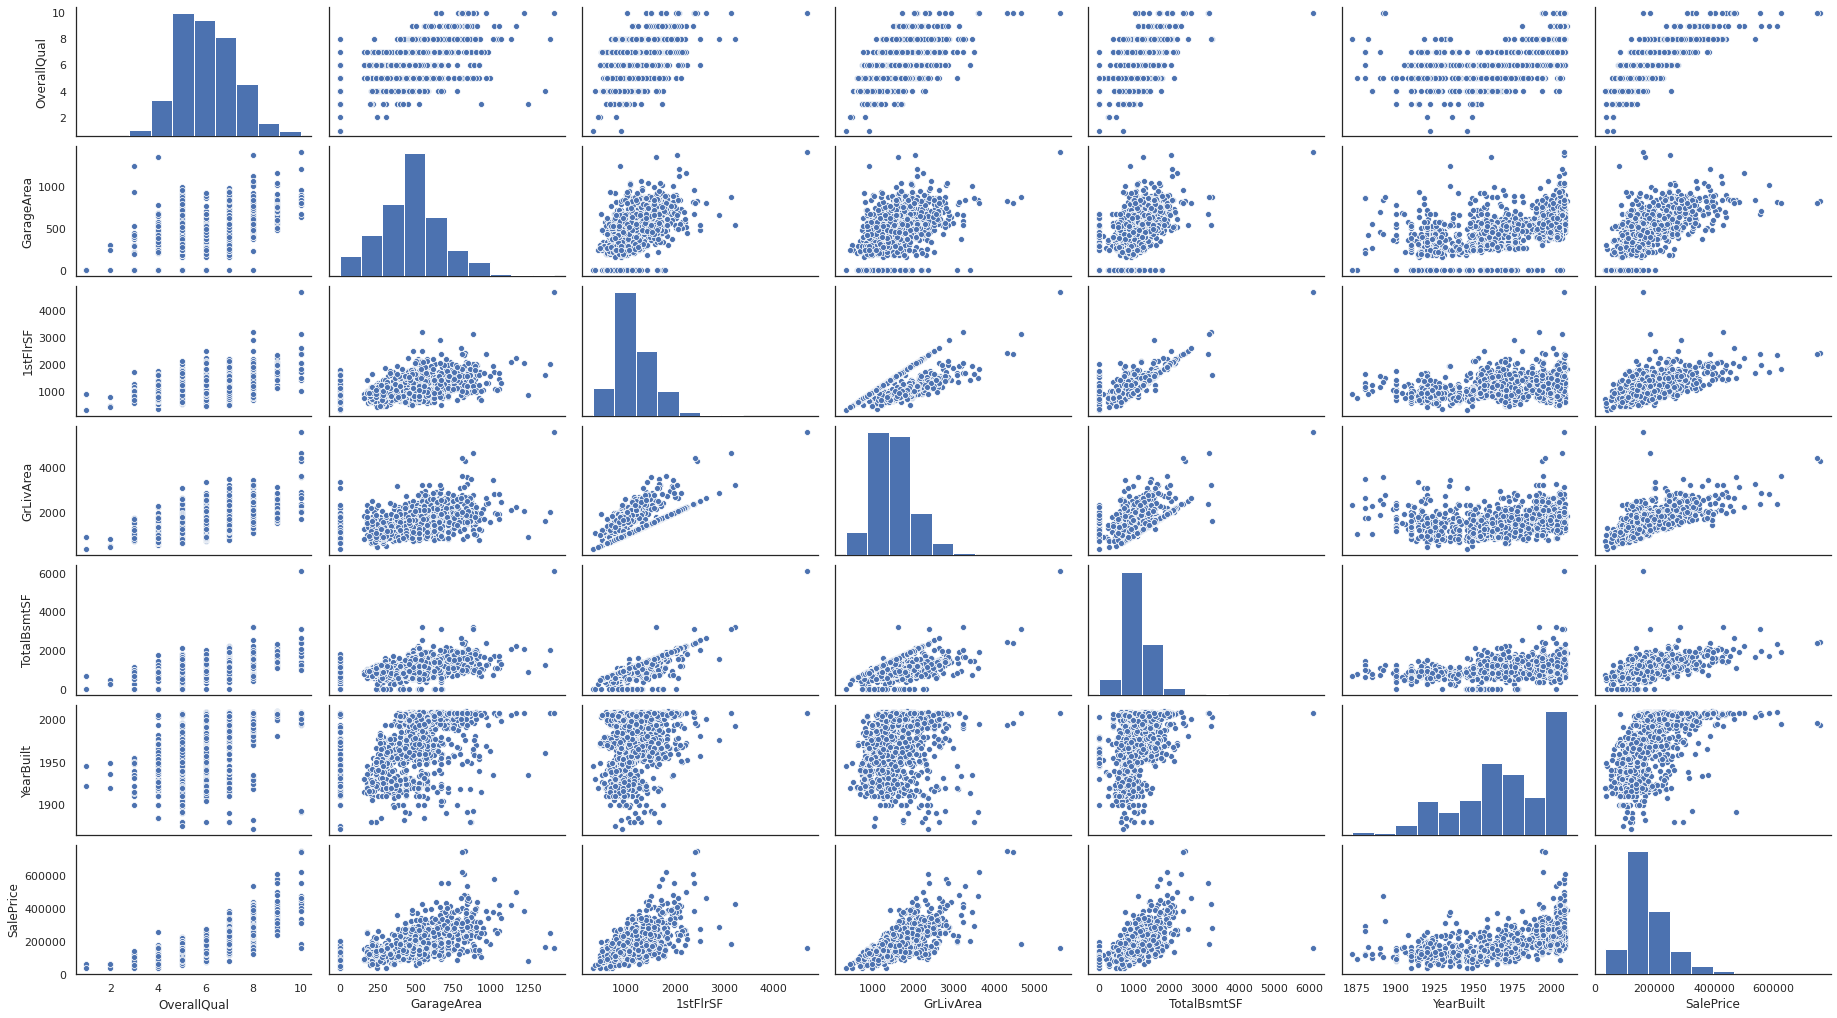

In [5]:
plt.figure(figsize=(15,8))
sns.pairplot(data_train,height=2, aspect=1.8)
plt.show()

In [6]:
data_train.isna().sum()

OverallQual    0
GarageArea     0
1stFlrSF       0
GrLivArea      0
TotalBsmtSF    0
YearBuilt      0
SalePrice      0
dtype: int64

In [7]:
data_train.describe()

,OverallQual,GarageArea,1stFlrSF,GrLivArea,TotalBsmtSF,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,472.980137,1162.626712,1515.463699,1057.429452,1971.267808,180921.195890
std,1.382997,213.804841,386.587738,525.480383,438.705324,30.202904,79442.502883
min,1.000000,0.000000,334.000000,334.000000,0.000000,1872.000000,34900.000000
25%,5.000000,334.500000,882.000000,1129.500000,795.750000,1954.000000,129975.000000
50%,6.000000,480.000000,1087.000000,1464.000000,991.500000,1973.000000,163000.000000
75%,7.000000,576.000000,1391.250000,1776.750000,1298.250000,2000.000000,214000.000000
max,10.000000,1418.000000,4692.000000,5642.000000,6110.000000,2010.000000,755000.000000


In [8]:
X= data_train[['OverallQual', 'GarageArea', '1stFlrSF', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt']]
y=data_train[['SalePrice']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = pd.DataFrame(model.predict(X_test))

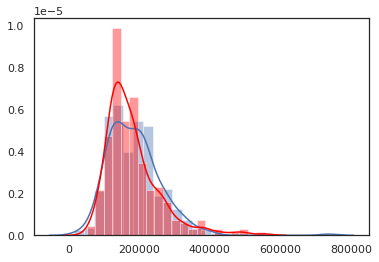

In [9]:
sns.distplot(y_pred)
sns.distplot(y_test, color='red')
plt.show()

In [10]:
submit = pd.read_csv('/content/test.csv')
sub = submit[['Id','OverallQual', 'GarageArea', '1stFlrSF', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt']]

In [11]:
sub.isna().sum()

Id             0
OverallQual    0
GarageArea     1
1stFlrSF       0
GrLivArea      0
TotalBsmtSF    1
YearBuilt      0
dtype: int64

In [12]:
sub[sub.TotalBsmtSF.isna()]

,Id,OverallQual,GarageArea,1stFlrSF,GrLivArea,TotalBsmtSF,YearBuilt
660,2121,4,280.0,896,896,NaN,1946


In [13]:
sub[sub.GarageArea.isna()]

,Id,OverallQual,GarageArea,1stFlrSF,GrLivArea,TotalBsmtSF,YearBuilt
1116,2577,5,NaN,942,1828,859.0,1923


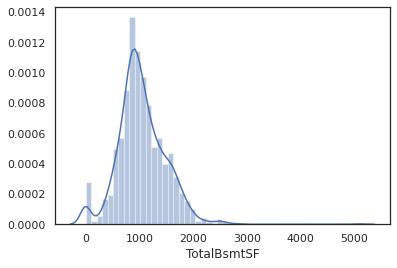

In [14]:
sns.distplot(sub.TotalBsmtSF)
plt.show()

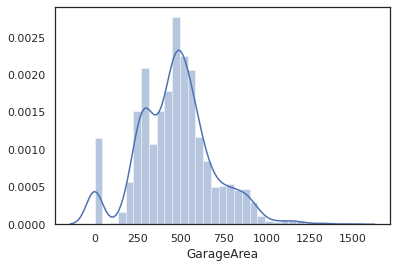

In [15]:
sns.distplot(sub.GarageArea)
plt.show()

In [16]:
sub[(sub.GrLivArea>=850)&(sub.GrLivArea<=950)]['TotalBsmtSF'].median()

868.0

In [17]:
sub.GarageArea.median()

480.0

In [18]:
sub.GarageArea.fillna(value=480, inplace=True)
sub.TotalBsmtSF.fillna(value=868, inplace=True)

sub['SalePrice']=model.predict(sub[['OverallQual', 'GarageArea', '1stFlrSF', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt']])
sub[['Id','SalePrice']].to_csv('hp.csv', index=False)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [19]:
sub[['Id','SalePrice']].to_csv('hp.csv', index=False)